In [2]:
# 用 K-means 演算法來分類鳶尾花

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy


# 1. 先載入鳶尾花資料

iris = load_iris()

# 這邊 iris 是 sklearn 的 bunch 物件，基本上就是字典，可以用屬性或中括號呼叫值

# 字典裡的樣本資料 x , y 會是 numpy 的陣列

x = iris["data"]
y = iris["target"]


# 2. 進行 K-means 分類，用 x 即可

# 先創建物件，和同樣 sklearn 的 Linear Regression 一樣

# ( 選擇性 )

# random_state 是隨機種子，為隨機選取的分布依據，如果要控制結果可以選擇一樣參數來產生相同結果

# n_init 為試行的次數，每次都以不同中心點開始，並取最小距離平方和的結果，避免有局部最小值的可能

model = KMeans(n_clusters=3,random_state=42,n_init=10)

# 再用資料跑模型

model.fit(x)


# 3. 找到分類結果，用得到模型的 labels 屬性

y_prediction = model.labels_


# 4. 因為 K-means 分類結果的類別代碼和原本的樣本分類代碼不見得一樣，所以要重新 map 分類結果的代碼來和原本樣本一樣

# 先創建一個和原本資料分類結果一樣大小的陣列 ( zero_like 是建立一個一樣大小的陣列，裡面都放 0 )

y_map = numpy.zeros_like(y)

# 用布林遮罩來選取類別分別是 0 , 1 , 2 的模型分類結果，再用樣本資料分類結果的眾數來代表模型分類出的類別的真正代碼

# 用 scipy.stats 的 mode，會回傳一個 tuple 有兩個值，第一個是眾數，第二個是數字是眾數的次數

from scipy.stats import mode

for i in range(3) : 

    y_map[y_prediction == i] = mode(y[y_prediction==i])[0]


# 5. 把 y_prediction map 完的 y_map 作為正確分群代碼的預測值 y 來產生準確度

print(accuracy_score(y,y_map))




[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

c:\Users\zxzxa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\zxzxa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


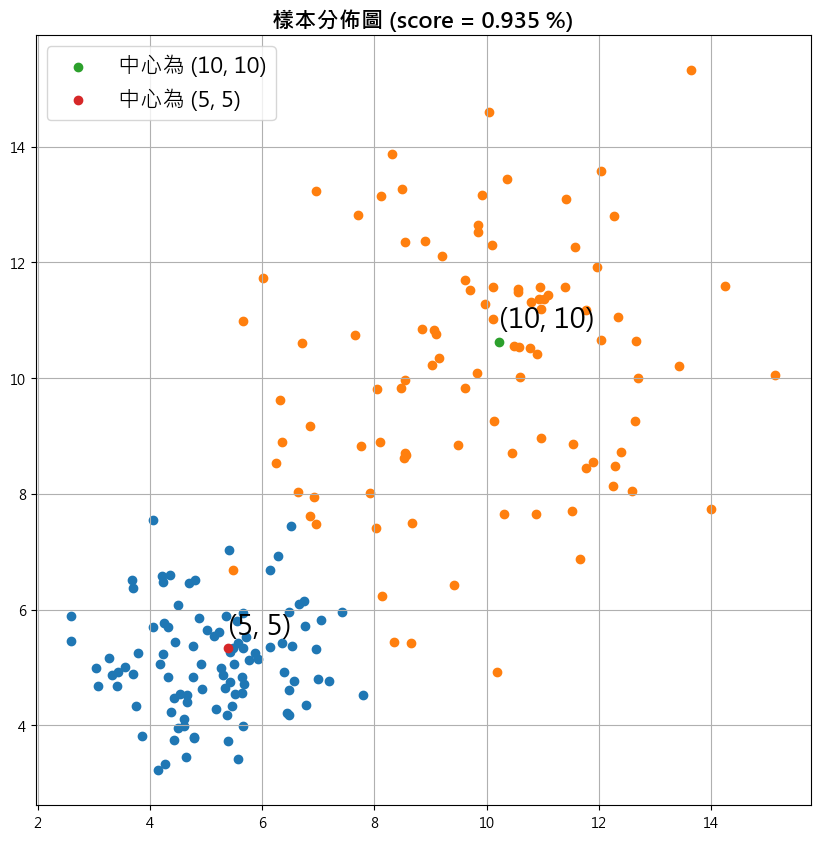

In [39]:
# 做一個自己產生資料並以 K-means 分類的例子


from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import numpy
import matplotlib.pyplot as plt
from scipy.stats import mode


# 1. 先產生資料

# 產生中心在 ( 5 , 5 ) 的 ( x1 , x2 ) 資料

x1 = numpy.random.normal(loc=5,scale=1,size=100)
x2 = numpy.random.normal(loc=5,scale=1,size=100)

x1_set = numpy.stack((x1,x2),axis=1)

y1 = numpy.zeros_like(x1)

# 產生中心在 ( 10 , 10 ) 的 ( x3 , x4 ) 資料

x3 = numpy.random.normal(loc=10,scale=2,size=100)
x4 = numpy.random.normal(loc=10,scale=2,size=100)

x2_set = numpy.stack((x3,x4),axis=1)

y2 = numpy.zeros_like(x3)
y2[:] = 1

# 將兩個 set 合併在一起

x = numpy.concatenate((x1_set,x2_set))

y = numpy.concatenate((y1,y2))

# 2. 把點的散佈圖先畫出來看看是不是有確實分兩群

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei" , "Simhei"]
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(10,10))

plt.scatter(x1_set[:,0],x1_set[:,1])
plt.scatter(x2_set[:,0],x2_set[:,1])


# 3. 使用 K-means 來進行分類

model = KMeans(n_clusters=2)

model.fit(x)


# 4. 將 model 產生的群組編號重新 map

y_prediction = model.labels_

y_map = numpy.zeros_like(y_prediction)

for i in range(2) : 

    y_map[y_prediction == i] = mode(y[y_prediction == i])[0]


# 5. 產生中心以及準確率

center_1 = model.cluster_centers_[0]
center_2 = model.cluster_centers_[1]

plt.scatter(center_1[0],center_1[1],label=f"中心為 {int(center_1[0]),int(center_1[1])}")
plt.scatter(center_2[0],center_2[1],label=f"中心為 {int(center_2[0]),int(center_2[1])}")

plt.annotate(f"{int(center_1[0]),int(center_1[1])}",(center_1[0],center_1[1]),textcoords="offset points",xytext=(0,10),ha="left",fontsize=20)
plt.annotate(f"{int(center_2[0]),int(center_2[1])}",(center_2[0],center_2[1]),textcoords="offset points",xytext=(0,10),ha="left",fontsize=20)

result = accuracy_score(y,y_map)

plt.title(f"樣本分佈圖 (score = {result} %)",fontsize=16,fontweight="bold")

plt.grid()
plt.legend(fontsize=16)

plt.show()

